In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


In [2]:
# Carregue seus dados em um DataFrame
data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')

C:\Users\Máquina -LPO\AppData\Local\Temp\ipykernel_11112\510367012.py:2: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')


In [3]:
comparison_df = data[['NEE_uStar_f', 'NPP']]

print(comparison_df.head(200))

     NEE_uStar_f                NPP
0       58803636             -58804
1       58803636             -58804
2       58803636             -58804
3       58803636             -58804
4       58803636             -58804
..           ...                ...
195     62527317             -62527
196     62377229             -62377
197     62230714 -62231000000000000
198     62856386             -62856
199     63920476             -63921

[200 rows x 2 columns]


In [4]:
#Encontrando um novo valor de NPP com a fórmula NPP = Nee + RECO
data['NPP_N'] = data['NEE_uStar_f'] + data['Reco_uStar']
print(data['NPP_N'])


0        58873789
1        58873789
2        58873863
3        58873863
4        58875620
           ...   
52555    78968395
52556    78968360
52557    78968330
52558    78968299
52559    78884520
Name: NPP_N, Length: 52560, dtype: int64


R2 Score: 0.9999503216157002


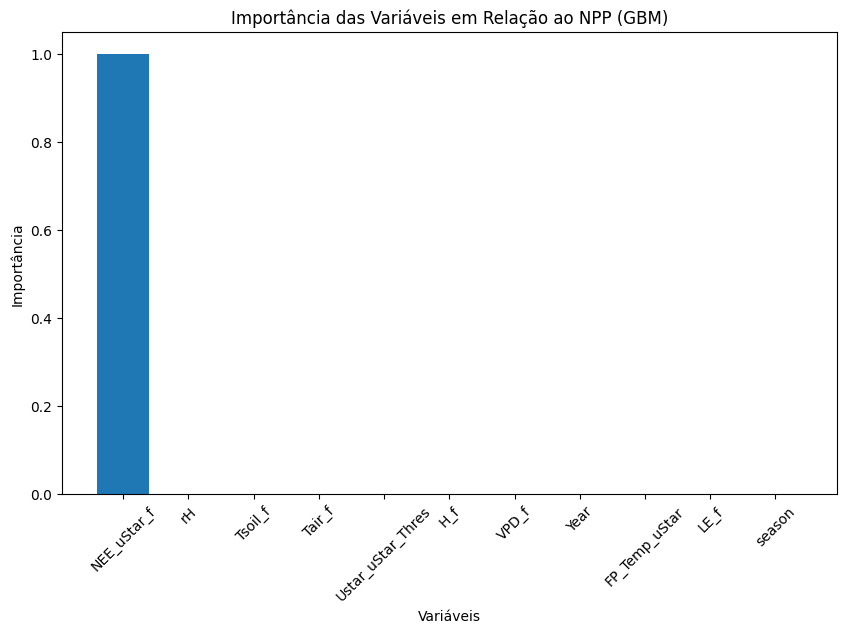

In [15]:
#Usando o novo valor de NPP chamdo de "NPP_N" para fazer o gráfico de importâncias
X = data[['Tair_f', 'VPD_f', 'rH', 'Year', 'H_f', 'FP_Temp_uStar', 'Tsoil_f', 'LE_f',  'season', 'Ustar_uStar_Thres', 'NEE_uStar_f']]
y = data['NPP_N']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingRegressor(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)


print(f"R2 Score: {r2}")


feature_importance = model.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title('Importância das Variáveis em Relação ao NPP (GBM)')
plt.xticks(rotation=45)
plt.show()

Correlação entre NPP_N e NEE_uStar_f: 0.9999996482878561
Resultados do Modelo Linear:
MSE (Mean Squared Error): 1176975109.8801692
MAE (Mean Absolute Error): 24645.795342436068
R-squared (R2 Score): 0.9999993107036347


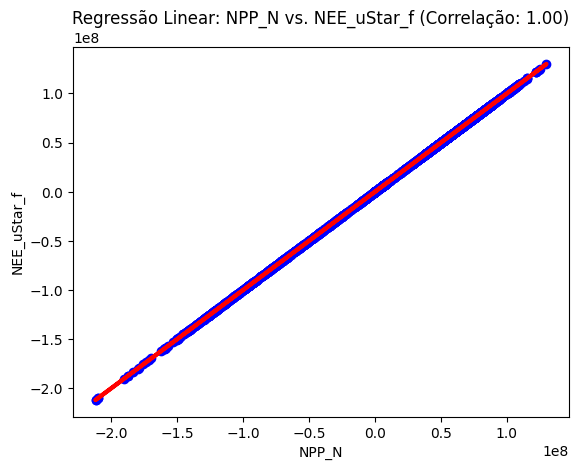

In [16]:
#Usando o NPP_N para correlacionar com  a variável de maior importância gerada do gráfico anterior 
X_column = 'NPP_N'
y_column = 'NEE_uStar_f'

X = data[[X_column]]
y = data[y_column]


correlation = np.corrcoef(X[X_column], y)[0, 1]


print(f'Correlação entre {X_column} e {y_column}: {correlation}')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


print("Resultados do Modelo Linear:")
print(f'MSE (Mean Squared Error): {mse_linear}')
print(f'MAE (Mean Absolute Error): {mae_linear}')
print(f'R-squared (R2 Score): {r2_linear}')


plt.scatter(X_test[X_column], y_test, color='blue')
plt.plot(X_test[X_column], y_pred_linear, color='red', linewidth=3)
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.title(f'Regressão Linear: {X_column} vs. {y_column} (Correlação: {correlation:.2f})')
plt.show()

